In [1]:
# Area code metadata
AREA_CODES = {
    "C4266": {
        "code": "42660",
        "name": "Seattle-Tacoma-Bellevue",
        "state": "WA",
        "region": "Seattle-Tacoma-Bellevue, WA MSA",
        "type": "MSA",
    },
    "C3890": {
        "code": "38900",
        "name": "Portland-Vancouver-Hillsboro",
        "state": "OR-WA",
        "region": "Portland-Vancouver-Hillsboro, OR-WA MSA",
        "type": "MSA",
    },
    "C3346" : {
        "code": "33460",
        "name": "Minneapolis-St Paul-Bloomington",
        "state": "MN-WI",
        "region": "Minneapolis-St Paul-Bloomington, MN-WI MSA",
        "type": "MSA",
    },
    "C1242": {
        "code": "12420",
        "name": "Austin-Round Rock-Georgetown",
        "state": "TX",
        "region": "Austin-Round Rock-Georgetown, TX MSA",
        "type": "MSA",
    },
    "C4790": {
        "code": "47900",
        "name": "Washington-Arlington-Alexandria",
        "state": "DC-VA-MD-WV",
        "region": "Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",
        "type": "MSA",
    }

}

# CBSA code metadata
CBSA_CODES = {
    "42660": {
        "code": "42660",
        "name": "Seattle-Tacoma-Bellevue",
        "state": "WA",
        "type": "MSA",
    },
    "38900": {
        "code": "38900",
        "name": "Portland-Vancouver-Hillsboro",
        "state": "OR-WA",
        "type": "MSA",
    },
    "33460" : {
        "code": "33460",
        "name": "Minneapolis-St Paul-Bloomington",
        "state": "MN-WI",
        "type": "MSA",
    },
    "12420": {
        "code": "12420",
        "name": "Austin-Round Rock-Georgetown",
        "state": "TX",
        "type": "MSA",
    },
    "47900": {
        "code": "47900",
        "name": "Washington-Arlington-Alexandria",
        "state": "DC-VA-MD-WV",
        "type": "MSA",
    }

}

# quarter mapping to month
QUARTER_TO_MONTH = {
    "1": ["01", "02", "03"],
    "2": ["04", "05", "06"],
    "3": ["07", "08", "09"],
    "4": ["10", "11", "12"]
}
# month to quarter mapping
MONTH_TO_QUARTER = {
    "01": "1", 
    "02": "1", 
    "03": "1", 
    "04": "2", 
    "05": "2", 
    "06": "2",   
    "07": "3",
    "08": "3",
    "09": "3",
    "10": "4",
    "11": "4",
    "12": "4"
}      

In [2]:
from bls_housing import load_area_df #, get_cached_path , fetch_area_csv
from collections import defaultdict
import pandas as pd

# areas = AREA_CODES["C4266"]["code"] # Seattle-Tacoma-Bellevue MSA
years = ["2020","2021","2022","2023","2024"]
quarters = ["1", "2", "3", "4"]
# Load DataFrame (uses cache if available)
# get total quarterly wages for MSA for each year and store in total_wages dict

data_list = []

for code in AREA_CODES:
    total_wages = defaultdict(int)

    for year in years:
        for qtr in quarters:
            df = load_area_df(code, year, qtr)
            
            msa = df[df.get('agglvl_code') == 40]
            total_wages_current_qtr = msa['total_qtrly_wages'].iloc[0]
            data_list.append({
                "Area": AREA_CODES[code]["name"],
                "Code": AREA_CODES[code]["code"],
                "Year": year,
                "Quarter": qtr,
                "Total Wages": total_wages_current_qtr
            })
           

# print(data_list)
wages_df = pd.DataFrame(data_list)

# Calculate annual total wages and percentage change
annual_df = wages_df.groupby(["Area", "Code", "Year"])["Total Wages"].sum().reset_index()
annual_df["Change"] = annual_df.groupby("Code")["Total Wages"].pct_change() * 100
print(annual_df)

                               Area   Code  Year   Total Wages     Change
0      Austin-Round Rock-Georgetown  12420  2020   74347045148        NaN
1      Austin-Round Rock-Georgetown  12420  2021   86539243397  16.399035
2      Austin-Round Rock-Georgetown  12420  2022   98564902276  13.896191
3      Austin-Round Rock-Georgetown  12420  2023  105404165981   6.938843
4      Austin-Round Rock-Georgetown  12420  2024  112635075220   6.860174
5   Minneapolis-St Paul-Bloomington  33460  2020  125079670147        NaN
6   Minneapolis-St Paul-Bloomington  33460  2021  132965536013   6.304674
7   Minneapolis-St Paul-Bloomington  33460  2022  141354450541   6.309089
8   Minneapolis-St Paul-Bloomington  33460  2023  146554465897   3.678706
9   Minneapolis-St Paul-Bloomington  33460  2024  152303078421   3.922509
10     Portland-Vancouver-Hillsboro  38900  2020   76498944463        NaN
11     Portland-Vancouver-Hillsboro  38900  2021   83777884363   9.515085
12     Portland-Vancouver-Hillsboro  3

In [3]:
# Load cleaned CBSA CSV from cache instead of manual XLS parsing
from bls_housing.census_cache import load_cbsa_df
import pandas as pd

years = ["2020","2021","2022","2023","2024"]
total_permits = defaultdict(int)
quarters = ["1", "2", "3", "4"]

data_list = []

for code in CBSA_CODES:
    area = CBSA_CODES[code]["code"]
    
    for year in years:
        total_permits[year] = 0
        # print(f"Year: {year}")
        for qtr in quarters:
            for i in QUARTER_TO_MONTH[qtr]:  # months in quarter
                df = load_cbsa_df(year, str(i))
                df_current_area = df[df['CBSA'] == int(area)]  # filter for CBSA
                # get total permits for CBSA
                total_permits_current_month = df_current_area['Total'].iloc[0]
                data_list.append({
                    "Area": CBSA_CODES[code]["name"],
                    "Code": code,
                    "Year": year,
                    "Quarter": qtr,
                    "Month": i,
                    "Total Permits": total_permits_current_month
                })
                
permits_df = pd.DataFrame(data_list)
# print(permits_df)                
    
# Calculate annual total permits and percentage change
annual_permits = permits_df.groupby(["Area", "Code", "Year"])["Total Permits"].sum().reset_index()
annual_permits["Change"] = annual_permits.groupby("Code")["Total Permits"].pct_change() * 100
print(annual_permits)

                               Area   Code  Year  Total Permits     Change
0      Austin-Round Rock-Georgetown  12420  2020        40627.0        NaN
1      Austin-Round Rock-Georgetown  12420  2021        50297.0  23.801905
2      Austin-Round Rock-Georgetown  12420  2022        42536.0 -15.430344
3      Austin-Round Rock-Georgetown  12420  2023        36300.0 -14.660523
4      Austin-Round Rock-Georgetown  12420  2024        33530.0  -7.630854
5   Minneapolis-St Paul-Bloomington  33460  2020        21339.0        NaN
6   Minneapolis-St Paul-Bloomington  33460  2021        25057.0  17.423497
7   Minneapolis-St Paul-Bloomington  33460  2022        24609.0  -1.787924
8   Minneapolis-St Paul-Bloomington  33460  2023        17359.0 -29.460766
9   Minneapolis-St Paul-Bloomington  33460  2024        15227.0 -12.281813
10     Portland-Vancouver-Hillsboro  38900  2020        12987.0        NaN
11     Portland-Vancouver-Hillsboro  38900  2021        15234.0  17.301917
12     Portland-Vancouver

In [6]:
final_df = pd.merge(
    annual_df,
    annual_permits,
    on=["Area", "Code", "Year"],
    suffixes=('_wage', '_permit')
)

final_df['Wage_Index'] = 1 + (final_df['Change_wage'] / 100)
final_df['Permit_Index'] = 1 + (final_df['Change_permit'] / 100)
final_df['Zoning_pressure'] = final_df['Wage_Index'] / final_df['Permit_Index']

print(final_df[['Area', 'Year', 'Zoning_pressure']].sort_values(by=['Area', 'Year']))

                               Area  Year  Zoning_pressure
0      Austin-Round Rock-Georgetown  2020              NaN
1      Austin-Round Rock-Georgetown  2021         0.940204
2      Austin-Round Rock-Georgetown  2022         1.346774
3      Austin-Round Rock-Georgetown  2023         1.253099
4      Austin-Round Rock-Georgetown  2024         1.156882
5   Minneapolis-St Paul-Bloomington  2020              NaN
6   Minneapolis-St Paul-Bloomington  2021         0.905310
7   Minneapolis-St Paul-Bloomington  2022         1.082444
8   Minneapolis-St Paul-Bloomington  2023         1.469802
9   Minneapolis-St Paul-Bloomington  2024         1.184732
10     Portland-Vancouver-Hillsboro  2020              NaN
11     Portland-Vancouver-Hillsboro  2021         0.933617
12     Portland-Vancouver-Hillsboro  2022         1.264976
13     Portland-Vancouver-Hillsboro  2023         1.191338
14     Portland-Vancouver-Hillsboro  2024         1.275069
15          Seattle-Tacoma-Bellevue  2020              N

Matplotlib is building the font cache; this may take a moment.


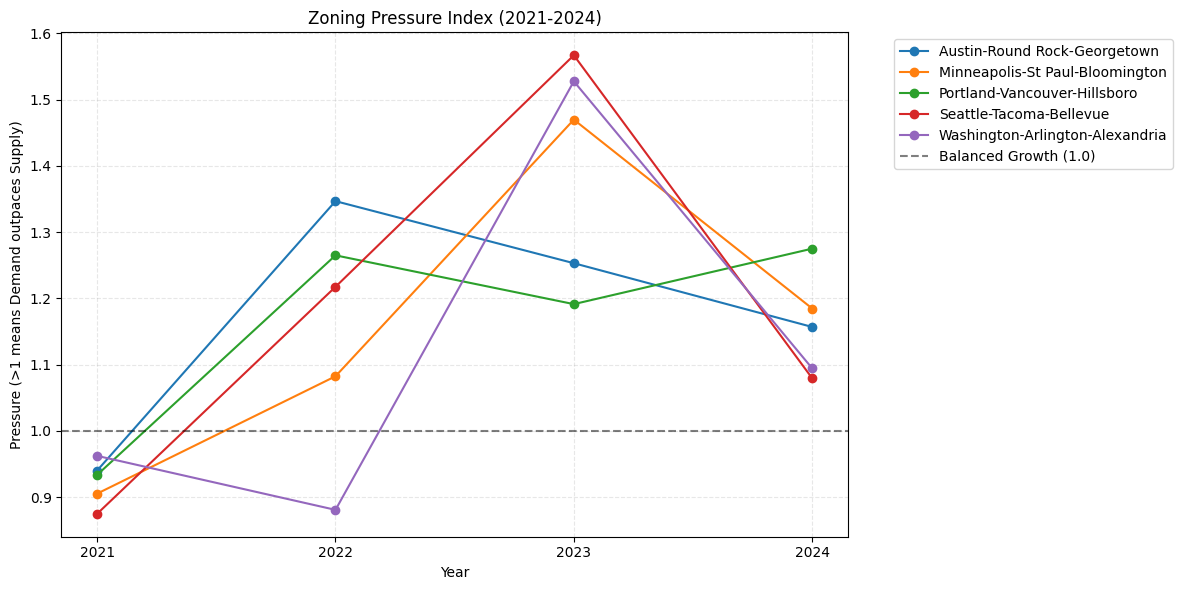

In [8]:
import matplotlib.pyplot as plt
pivot_df = final_df.pivot(index='Year', columns='Area', values='Zoning_pressure')

plt.figure(figsize=(12, 6))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker='o', label=column)

plt.axhline(y=1.0, color='black', linestyle='--', alpha=0.5, label='Balanced Growth (1.0)')

plt.title('Zoning Pressure Index (2021-2024)')
plt.ylabel('Pressure (>1 means Demand outpaces Supply)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [2]:
# Load cleaned CBSA CSV from cache instead of manual XLS parsing
from bls_housing.census_cache import load_cbsa_df
df = load_cbsa_df('2025', '1')
print(df.keys())
df.head(10)

Index(['CSA', 'CBSA', 'Name', 'Metro /Micro Code', 'Total', '1 Unit',
       '2 Units', '3 and 4 Units', '5 Units or More',
       'Num of Structures With 5 Units or More', 'nan', 'Total_year_to_date',
       '1 Unit_year_to_date', '2 Units_year_to_date',
       '3 and 4 Units_year_to_date', '5 Units or More_year_to_date',
       'Num of Structures With 5 Units or More_year_to_date'],
      dtype='object')


,CSA,CBSA,Name,Metro /Micro Code,Total,1 Unit,2 Units,3 and 4 Units,5 Units or More,Num of Structures With 5 Units or More,nan,Total_year_to_date,1 Unit_year_to_date,2 Units_year_to_date,3 and 4 Units_year_to_date,5 Units or More_year_to_date,Num of Structures With 5 Units or More_year_to_date
0,999,10100,"Aberdeen, SD ...",5,0,0,0,0,0,0,NaN,0,0,0,0,0,0
1,999,10140,"Aberdeen, WA ...",5,24,24,0,0,0,0,NaN,24,24,0,0,0,0
2,101,10180,"Abilene, TX ...",2,82,78,4,0,0,0,NaN,82,78,4,0,0,0
3,999,10220,"Ada, OK ...",5,4,0,4,0,0,0,NaN,4,0,4,0,0,0
4,220,10300,"Adrian, MI ...",5,8,8,0,0,0,0,NaN,8,8,0,0,0,0
5,184,10420,"Akron, OH ...",2,56,42,0,0,14,2,NaN,56,42,0,0,14,2
6,999,10460,"Alamogordo, NM ...",5,1,1,0,0,0,0,NaN,1,1,0,0,0,0
7,999,10480,"Alamosa, CO ...",5,10,6,4,0,0,0,NaN,10,6,4,0,0,0
8,999,10500,"Albany, GA ...",4,6,6,0,0,0,0,NaN,6,6,0,0,0,0
9,440,10540,"Albany, OR ...",2,10,8,2,0,0,0,NaN,10,8,2,0,0,0


In [4]:
# Show cached CSV path
from bls_housing.census_cache import get_cached_csv_path
print(get_cached_csv_path('2025', '1'))


/home/ekang/python_BLS_housing/data/cache/census/csv/CBSA_2025_01.csv


In [ ]:
df_current_area = df[df['CBSA'] == 42660]  # filter for Seattle MSA
print(df_current_area)

# get total permits for Seattle MSA
df_Seattle_total_wages = df_current_area['Total'].iloc[0]

#print(df_Seattle_total_wages.columns)
#print(df_Seattle.columns.value_counts())
print(f"[Total: {df_Seattle_total_wages}]")


     CSA   CBSA                                               Name  \
753  500  42660  Seattle-Tacoma-Bellevue, WA                   ...   

     Metro /Micro Code  Total  1 Unit  2 Units  3 and 4 Units  \
753                  2   1203     528       68             78   

     5 Units or More  Num of Structures With 5 Units or More  nan  \
753              529                                      24  NaN   

     Total_year_to_date  1 Unit_year_to_date  2 Units_year_to_date  \
753                1203                  528                    68   

     3 and 4 Units_year_to_date  5 Units or More_year_to_date  \
753                          78                           529   

     Num of Structures With 5 Units or More_year_to_date  
753                                                 24    
[Total: 1203]
